Train DataFrame shape: (159571, 8)

Train DataFrame Head:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  

Null values by column in train:
id               0
comment_text     0
toxic            0
severe_toxic     

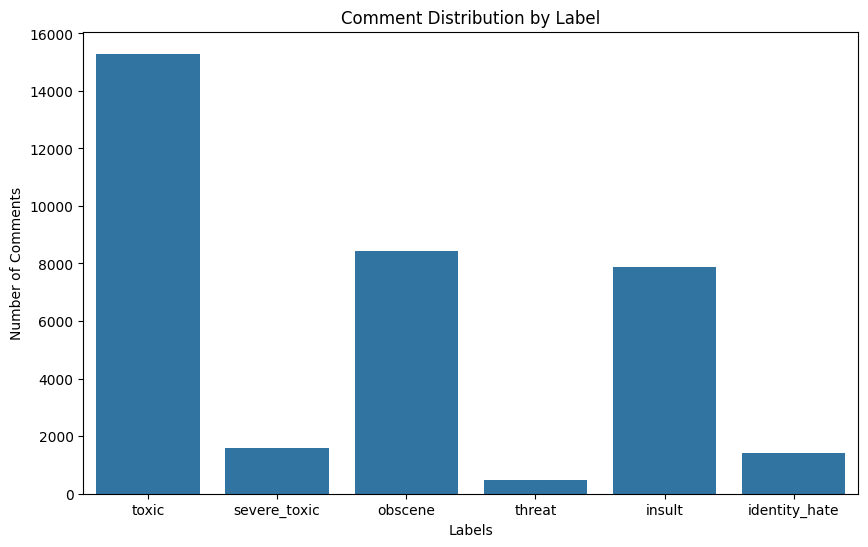

In [1]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Dataset/train.csv')

print("Train DataFrame shape:", df.shape)

print("\nTrain DataFrame Head:")
print(df.head())

print("\nNull values by column in train:")
print(df.isnull().sum())

label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
print("\nLabel distribution in train:")
print(df[label_cols].sum().sort_values(ascending=False))

plt.figure(figsize=(10,6))
sns.barplot(x=df[label_cols].sum().index, y=df[label_cols].sum().values)
plt.title('Distribución de comentarios por etiqueta')
plt.title('Comment Distribution by Label')
plt.ylabel('Number of Comments')
plt.xlabel('Labels')
plt.show()

In [2]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
print("Aviable labels as 'fileids'")
print(labels)

Aviable labels as 'fileids'
['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [3]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

label_stats = {}

for label in labels:
    comments = df[df[label] == 1]['comment_text'].dropna()
    num_comments = len(comments)
    total_words = sum(len(word_tokenize(comment.lower())) for comment in comments)
    label_stats[label] = {'num_comments': num_comments, 'total_words': total_words}

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
for label in labels:
    print(f"{label}: {label_stats[label]}")

toxic: {'num_comments': 15294, 'total_words': 965830}
severe_toxic: {'num_comments': 1595, 'total_words': 161121}
obscene: {'num_comments': 8449, 'total_words': 514086}
threat: {'num_comments': 478, 'total_words': 38647}
insult: {'num_comments': 7877, 'total_words': 467647}
identity_hate: {'num_comments': 1405, 'total_words': 85955}


In [5]:
for label in labels:
    comments = df[df[label] == 1]['comment_text'].dropna()
    num_words = [word for comment in comments for word in word_tokenize(comment)]
    num_sents = [sent for comment in comments for sent in nltk.sent_tokenize(comment)]
    num_chars = sum(len(comment) for comment in comments)
    num_vocab = set(word.lower() for word in num_words)
    print(round(num_chars / len(num_words)), round(len(num_words) / len(num_sents)), round(len(num_words) / len(num_vocab)), label)

5 15 25 toxic
4 13 25 severe_toxic
5 14 21 obscene
4 13 12 threat
5 14 21 insult
5 16 11 identity_hate


In [6]:
from nltk import sent_tokenize

label = 'toxic'
all_label_sentences = df[df[label] == 1]['comment_text'].dropna().tolist()
all_label_sentences_t = [
    [word_tokenize(sentence) for sentence in sent_tokenize(comment)]
    for comment in all_label_sentences
]

print(all_label_sentences_t[0])

logest_len = max(len(comment) for comment in all_label_sentences_t)
print(f"\n{logest_len}\n")
[s for s in all_label_sentences_t if len(s) == logest_len]

[['COCKSUCKER', 'BEFORE', 'YOU', 'PISS', 'AROUND', 'ON', 'MY', 'WORK']]

683



[[['do',
   'go',
   'fuck',
   'off',
   'bastard',
   'Do',
   'Yyou',
   'Have',
   'a',
   'life',
   '?'],
  ['go',
   'fuck',
   'off',
   'bastard',
   'and',
   'yank',
   'your',
   'cock',
   'through',
   'your',
   'ass',
   '.'],
  ['I', 'hate', 'you', 'and', 'hope', 'you', 'go', 'away', 'forever', '.'],
  ['lame', 'is', 'you', 'fuck', 'your', 'mom', '.'],
  ['die', 'die', 'die', 'and', 'all', 'that', 'crap', '.'],
  ['this', 'is', 'for', 'mahy', 'mahonerz', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I', 'ass', '.'],
  ['I',